<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Seguimiento 1  </center></font></h2>
<h3><font color='0B5345'> <center>
Diego Andrés Flórez - Daniel Felipe Soto </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

## **INTRODUCCIÓN**.
**Introducción a la electromiografía y características de la señal**

La electromiografía (EMG) es una técnica ampliamente para evaluar la actividad eléctrica de los músculos. Esta técnica proporciona información valiosa sobre el funcionamiento del sistema neuromuscular, permitiendo diagnosticar trastornos neuromusculares, evaluar la función muscular y monitorear la actividad muscular durante diversas actividades y terapias.

La señal de electromiografía se genera por la actividad eléctrica de las unidades motoras en el músculo durante la contracción. Estas señales pueden ser registradas utilizando electrodos colocados en la superficie de la piel (electromiografía de superficie) o mediante agujas insertadas directamente en el músculo (electromiografía de aguja). La señal de EMG es una representación de la actividad eléctrica de las fibras musculares, que varía en amplitud y frecuencia según la fuerza y el tipo de contracción muscular.

Las características principales de la señal de EMG incluyen su amplitud, duración, frecuencia y forma de onda. La amplitud de la señal refleja la cantidad de actividad eléctrica generada por las fibras musculares, mientras que la duración indica la temporalidad de la actividad muscular. La frecuencia de la señal está relacionada con la velocidad de contracción y la fatiga muscular. La forma de onda de la señal puede proporcionar información adicional sobre la sincronización y coordinación de la actividad muscular.

**Descripción del operador de TKEO y su interpretación.**

El operador de Teager-Kaiser Energy Operator (TKEO) es una técnica utilizada para analizar las señales de electromiografía y resaltar características relevantes relacionadas con la actividad muscular. Este operador calcula una medida de la energía local en la señal, enfocándose en los cambios instantáneos en la amplitud de la señal.
El resultado del operador TKEO resalta los cambios instantáneos en la señal, lo que puede ser útil para detectar eventos de interés relacionados con la actividad muscular, como contracciones musculares rápidas o cambios bruscos en la actividad eléctrica. La interpretación de la señal resultante del TKEO se centra en la identificación de picos y valles que pueden corresponder a eventos musculares específicos, como la activación o desactivación de unidades motoras.


In [2]:
from google.colab import files
import numpy as np
import pandas as pd




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).**

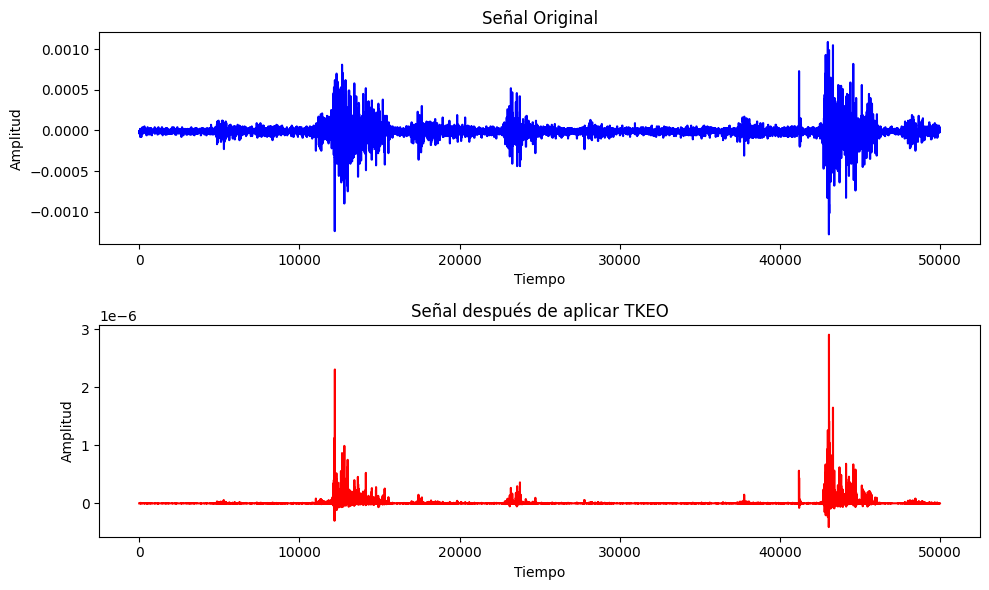

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def apply_TKEO(signal):
    """
    Aplica el operador Teager-Kaiser Energy Operator (TKEO) a una señal.

    Args:
    - signal: Señal.

    Returns:
    - signal_tkeo: Señal después de aplicar TKEO.
    """
    # Aplicar el operador TKEO
    signal_tkeo = signal[1:-1] ** 2 - signal[:-2] * signal[2:]

    return signal_tkeo

# Lista para almacenar los datos de la columna 3
columna_3 = []

# Contador para controlar el número de filas procesadas
filas_procesadas = 0

# Abrir el archivo y leer la columna 3
with open('/content/1_raw_data_10-51_07.04.16.txt', 'r', encoding='latin-1') as file:
    next(file)  # Saltar la primera línea (encabezados de columna)
    for linea in file:
        # Separar la línea en columnas
        columnas = linea.split('\t')
        # Extraer el valor de la columna 3 y convertirlo a float
        valor_columna_3 = float(columnas[2])
        # Agregar el valor a la lista
        columna_3.append(valor_columna_3)

        # Incrementar el contador de filas procesadas
        filas_procesadas += 1
        # Verificar si se han procesado las primeras 50000 filas
        if filas_procesadas >= 50000:
            break

# Convertir la lista a un array de NumPy
columna_3_array = np.array(columna_3)

# Aplicar el operador TKEO a la columna 3
columna_3_tkeo = apply_TKEO(columna_3_array)

# Crear el array de tiempo
tiempo = np.arange(len(columna_3_array))

# Crear la figura y los subgráficos
plt.figure(figsize=(10, 6))

# Gráfico de la señal original
plt.subplot(2, 1, 1)
plt.plot(tiempo, columna_3_array, color='blue')
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Gráfico de la señal después de aplicar TKEO
plt.subplot(2, 1, 2)
plt.plot(tiempo[1:-1], columna_3_tkeo, color='red')
plt.title('Señal después de aplicar TKEO')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()



La señal electromiográfica (EMG) **original** exhibe una forma de onda compleja y con amplitud variable, caracterizada por la presencia de picos prominentes que indican la activación de unidades motoras y una frecuencia variable que refleja la contracción muscular. Esta señal contiene varios componentes, incluyendo actividad muscular, ruido y artefactos, y puede ser analizada tanto en el dominio de la frecuencia como en el dominio del tiempo, lo que permite identificar diferentes componentes y estudiar su evolución a lo largo del tiempo.


* Forma de onda: Compleja (Por el ruido ) y con amplitud variable
* Picos prominentes: Presentes, representando la activación de unidades motoras.
* Frecuencia: Variable, reflejando la contracción muscular.
* Análisis de frecuencia: Permite identificar diferentes componentes (baja, media y alta frecuencia).
* Análisis de tiempo: Permite estudiar la evolución de la señal en el tiempo

Por otro lado, al aplicar el operador **Teager-Kaiser Energy Operator (TKEO)** a la señal original, se observa una transformación significativa. La señal resultante del TKEO presenta una forma de onda más suave y con amplitud más constante, con picos prominentes atenuados. Además, la frecuencia de la señal TKEO es más baja que la de la señal original. En términos de componentes, la actividad muscular se conserva, mientras que el ruido y los artefactos se reducen. El análisis comparativo revela que el TKEO suaviza la señal, facilitando la identificación de diferentes componentes y la medición de parámetros como la amplitud y la potencia media. Además, atenúa los picos prominentes al eliminar las componentes de alta frecuencia, lo que hace que la señal sea más adecuada para el análisis de la actividad muscular a largo plazo.


* Forma de onda: Más suave y con amplitud más constante.
* Picos prominentes: Atenuados con respecto a la original.
* Frecuencia: Más baja con respecto a la original.
* Análisis de frecuencia: Se atenúan las componentes de alta frecuencia.
* Análisis de tiempo: Se facilita la identificación de los diferentes componentes.

# **2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.**

<ipython-input-4-a3673a7fb801>:46: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emg = pd.read_csv('/content/1_raw_data_10-51_07.04.16.txt', sep='\t', header=None, encoding='latin-1')


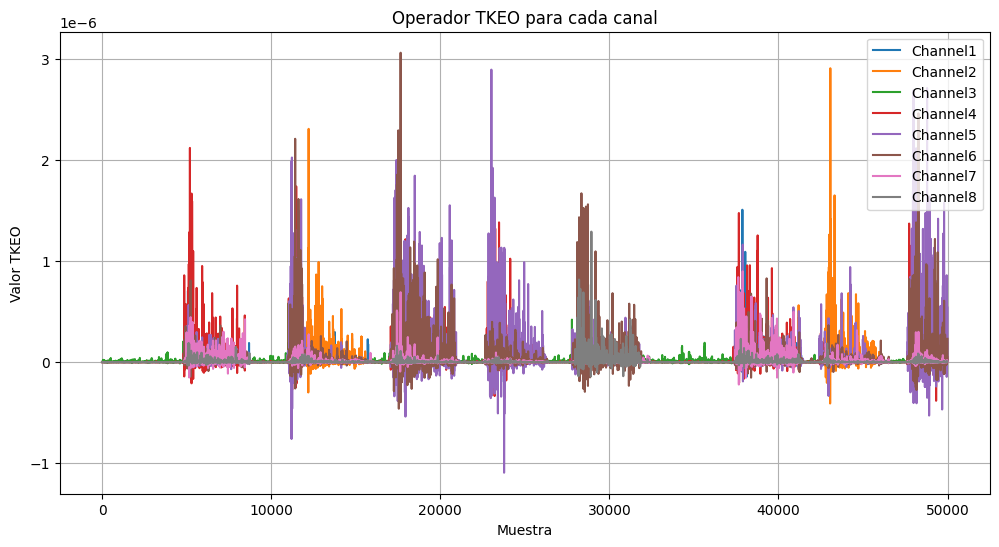

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def apply_TKEO(signal):
    """
    Aplica el operador Teager-Kaiser Energy Operator (TKEO) a una señal.

    Args:
    - signal: Señal.

    Returns:
    - signal_tkeo: Señal después de aplicar TKEO.
    """
    # Aplicar el operador TKEO
    signal_tkeo = signal[1:-1] ** 2 - signal[:-2] * signal[2:]

    return signal_tkeo

def calculate_TKEO_for_channels(data):
    """
    Calcula el operador TKEO para las primeras 50000 filas de cada canal de datos EMG.

    Args:
    - data: DataFrame de pandas que contiene los datos EMG de múltiples canales.

    Returns:
    - tkeo_data: DataFrame de pandas que contiene los resultados del operador TKEO para las primeras 50000 filas de cada canal.
    """
    # Convertir las columnas de los canales a tipo numérico
    channel_columns = [col for col in data.columns if col.startswith('Channel')]
    data[channel_columns] = data[channel_columns].apply(pd.to_numeric, errors='coerce')

    # Tomar las primeras 50000 filas de cada canal
    data = data.head(50000)

    # Calcular el operador TKEO para cada canal
    tkeo_data = pd.DataFrame()
    for column in channel_columns:
        # Aplicar el operador TKEO a las primeras 50000 filas del canal actual
        tkeo_data[column] = apply_TKEO(data[column].values)

    return tkeo_data

# Leer los datos EMG desde un archivo (suponiendo que ya has eliminado la primera fila)
df_emg = pd.read_csv('/content/1_raw_data_10-51_07.04.16.txt', sep='\t', header=None, encoding='latin-1')

# Asignar nombres de columna
df_emg.columns = ['Time', 'Channel1', 'Channel2', 'Channel3', 'Channel4', 'Channel5', 'Channel6', 'Channel7', 'Channel8', 'Class']
# Eliminar la primera fila del DataFrame
df_emg = df_emg.iloc[1:]

# Calcular el operador TKEO para las primeras 50000 filas de cada canal
df_tkeo = calculate_TKEO_for_channels(df_emg)

# Graficar los resultados del operador TKEO para cada canal
plt.figure(figsize=(12, 6))
for column in df_tkeo.columns:
    plt.plot(df_tkeo.index, df_tkeo[column], label=column)

plt.title('Operador TKEO para cada canal')
plt.xlabel('Muestra')
plt.ylabel('Valor TKEO')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()




Este código lee los datos EMG de un archivo, calculará el operador TKEO para las primeras 50000 filas de cada canal y graficará los resultados del operador TKEO para cada canal.




# **3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal**
* RMS
* Varianza
* Mean Absolute Value
* Mean Absolute Value Slope
* Slope Sign Changes
* Wave form length
* Zero Crossing

In [7]:
import pandas as pd
import numpy as np

def extract_channel_features(data):
    """
    Calcula las características solicitadas para cada canal en los datos EMG.

    Args:
    - data: DataFrame de pandas que contiene los datos EMG de múltiples canales.

    Returns:
    - features: DataFrame de pandas que contiene las características calculadas para cada canal.
    """
    features = {}

    # Calcular características para cada canal
    for column in data.columns:
        if column.startswith('Channel'):
            channel_data = data[column].astype(float)  # Convertir los datos a tipo float si no lo están

            # Calcular RMS (Root Mean Square)
            rms = np.sqrt(np.mean(channel_data ** 2))

            # Calcular la Varianza
            variance = np.var(channel_data)

            # Calcular el Valor Absoluto Medio (Mean Absolute Value)
            mav = np.mean(np.abs(channel_data))

            # Calcular la Pendiente del Valor Absoluto Medio (Mean Absolute Value Slope)
            mav_slope = np.mean(np.abs(np.diff(channel_data)))

            # Calcular el número de cambios de signo de la pendiente (Slope Sign Changes)
            slope_sign_changes = np.sum(np.diff(np.sign(np.diff(channel_data))) != 0)

            # Calcular la Longitud de la Forma de Onda (Waveform Length)
            waveform_length = np.sum(np.abs(np.diff(channel_data)))

            # Calcular el número de cruces por cero (Zero Crossing)
            zero_crossing = len(np.where(np.diff(np.sign(channel_data)))[0])

            # Almacenar las características en un diccionario
            features[column] = {
                'RMS': rms,
                'Variance': variance,
                'Mean Absolute Value': mav,
                'Mean Absolute Value Slope': mav_slope,
                'Slope Sign Changes': slope_sign_changes,
                'Waveform Length': waveform_length,
                'Zero Crossing': zero_crossing
            }

    # Convertir el diccionario de características en un DataFrame
    features_df = pd.DataFrame.from_dict(features, orient='index')

    return features_df

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame que contiene los datos de los canales EMG
features = extract_channel_features(df_emg)
print(features)
# Supongamos que ya tienes un DataFrame llamado df y has calculado las características utilizando la función extract_features

               RMS      Variance  Mean Absolute Value  \
Channel1  0.000076  5.768715e-09             0.000038   
Channel2  0.000090  7.963477e-09             0.000043   
Channel3  0.000079  6.146023e-09             0.000050   
Channel4  0.000142  2.002030e-08             0.000070   
Channel5  0.000210  4.376362e-08             0.000108   
Channel6  0.000174  2.999562e-08             0.000092   
Channel7  0.000090  8.008247e-09             0.000048   
Channel8  0.000076  5.703419e-09             0.000038   

          Mean Absolute Value Slope  Slope Sign Changes  Waveform Length  \
Channel1                   0.000006               12378          0.49227   
Channel2                   0.000007               12598          0.54420   
Channel3                   0.000008               13018          0.66649   
Channel4                   0.000012               12828          0.98304   
Channel5                   0.000018               12502          1.41109   
Channel6                   0.0

# **4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3.**

In [8]:
import zipfile
import io
import pandas as pd
import numpy as np

def extract_features(data):
    # Extraer características de cada canal
    rms = data.apply(lambda x: np.sqrt(np.mean(x**2)), axis=0)
    variance = data.var()
    mean_absolute_value = data.abs().mean()
    mean_absolute_value_slope = data.abs().diff().mean()
    slope_sign_changes = np.sum(np.diff(np.sign(data), axis=0) != 0)
    wave_form_length = np.sum(np.abs(np.diff(data, axis=0)))
    zero_crossing = np.sum(np.diff(np.sign(data), axis=0) != 0)

    # Crear un DataFrame con las características extraídas
    features = pd.DataFrame({
        'RMS': rms,
        'Variance': variance,
        'Mean Absolute Value': mean_absolute_value,
        'Mean Absolute Value Slope': mean_absolute_value_slope,
        'Slope Sign Changes': slope_sign_changes,
        'Wave form length': wave_form_length,
        'Zero Crossing': zero_crossing
    })

    return features

def calculate_TKEO_for_channels(data):
    # Calcular TKEO para cada canal
    tkeo = data ** 2 - data.shift(1) * data.shift(-1)
    # Eliminar la primera fila
    tkeo = tkeo.dropna()
    # Eliminar la última columna
    tkeo = tkeo.iloc[:, :-1]

    return tkeo

nombre_archivo_zip = 'emg+data+for+gestures.zip'

# Lista para almacenar los resultados
resultados = []

with zipfile.ZipFile(nombre_archivo_zip, 'r') as zip_ref:
    for nombre_archivo in zip_ref.namelist():
        if nombre_archivo.endswith('.txt'):
            # Extraer el contenido del archivo
            contenido = zip_ref.read(nombre_archivo)

            # Convertir el contenido en un DataFrame
            try:
                df = pd.read_csv(io.BytesIO(contenido), sep='\t', usecols=range(1, 10), encoding='latin-1')

                # Aplicar las funciones extract_features y calculate_TKEO_for_channels al DataFrame
                features = extract_features(df)
                tkeo = calculate_TKEO_for_channels(df)

                # Almacenar los resultados
                resultados.append({
                    'Archivo': nombre_archivo,
                    'Caracteristicas': features.to_dict(),  # Convertir DataFrame a diccionario
                    'TKEO': tkeo.to_dict()  # Convertir DataFrame a diccionario
                })
            except Exception as e:
                print(f"Error al procesar el archivo {nombre_archivo}: {e}")

# Lista para almacenar los DataFrames de características y TKEO
dfs_caracteristicas = []
dfs_tkeo = []

# Iterar sobre cada resultado
for resultado in resultados:
    # Extraer el nombre del archivo y las características
    nombre_archivo = resultado['Archivo']
    caracteristicas = resultado['Caracteristicas']
    tkeo = resultado['TKEO']

    # Convertir los diccionarios de características y TKEO en DataFrames
    df_caracteristicas = pd.DataFrame(caracteristicas)
    df_tkeo = pd.DataFrame(tkeo)

    # Agregar una columna 'Archivo' al DataFrame de características y TKEO
    df_caracteristicas['Archivo'] = nombre_archivo
    df_tkeo['Archivo'] = nombre_archivo

    # Agregar los DataFrames a la lista
    dfs_caracteristicas.append(df_caracteristicas)
    dfs_tkeo.append(df_tkeo)

# Concatenar los DataFrames de características y TKEO
df_caracteristicas_concatenado = pd.concat(dfs_caracteristicas, ignore_index=True)
df_tkeo_concatenado = pd.concat(dfs_tkeo, ignore_index=True)

# Mostrar los DataFrames
print("Características:")
print(df_caracteristicas_concatenado)
print("\nTKEO:")
print(df_tkeo_concatenado)



Error al procesar el archivo EMG_data_for_gestures-master/README.txt: Usecols do not match columns, columns expected but not found: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Características:
          RMS      Variance  Mean Absolute Value  Mean Absolute Value Slope  \
0    0.000144  2.075257e-08             0.000074              -1.635225e-23   
1    0.000134  1.782588e-08             0.000076              -1.582404e-10   
2    0.000124  1.541628e-08             0.000073               6.329615e-10   
3    0.000155  2.390342e-08             0.000082              -3.164807e-10   
4    0.000198  3.923224e-08             0.000107               4.747211e-10   
..        ...           ...                  ...                        ...   
643  0.000210  4.405977e-08             0.000119               2.025809e-09   
644  0.000100  9.992288e-09             0.000062              -2.025809e-10   
645  0.000088  7.663966e-09             0.000049               2.025809e-10   
646  0.000093  8.621649e-09      

# **5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales**

In [ ]:
def extract_features(data):
    rms = data.apply(lambda x: np.sqrt(np.mean(x**2)), axis=0)
    variance = data.var()
    mean_absolute_value = data.abs().mean()
    mean_absolute_value_slope = data.abs().diff().mean()
    slope_sign_changes = np.sum(np.diff(np.sign(data), axis=0) != 0)
    wave_form_length = np.sum(np.abs(np.diff(data, axis=0)))
    zero_crossing = np.sum(np.diff(np.sign(data), axis=0) != 0)

    features = pd.DataFrame({
        'RMS': rms,
        'Variance': variance,
        'Mean Absolute Value': mean_absolute_value,
        'Mean Absolute Value Slope': mean_absolute_value_slope,
        'Slope Sign Changes': slope_sign_changes,
        'Wave form length': wave_form_length,
        'Zero Crossing': zero_crossing
    })

    return features

# Nombre del archivo zip
nombre_archivo_zip = 'emg+data+for+gestures.zip'

# Lista para almacenar los resultados
resultados = []

# Abrir el archivo zip
with zipfile.ZipFile(nombre_archivo_zip, 'r') as zip_ref:
    # Iterar sobre cada archivo en el zip
    for nombre_archivo in zip_ref.namelist():
        # Verificar si es un archivo de texto
        if nombre_archivo.endswith('.txt'):
            # Leer el contenido del archivo
            contenido = zip_ref.read(nombre_archivo)

            # Convertir el contenido en un DataFrame
            try:
                df = pd.read_csv(io.BytesIO(contenido), sep='\t', usecols=range(1, 9), encoding='latin-1')

                # Aplicar la función extract_features a las señales de EMG
                features = extract_features(df)

                # Almacenar el resultado junto con el nombre del archivo
                resultados.append({
                    'Archivo': nombre_archivo,
                    'Caracteristicas': features
                })
            except Exception as e:
                print(f"Error al procesar el archivo {nombre_archivo}: {e}")
# Convertir los resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)

for idx, row in resultados_df.iterrows():
    print(f"Archivo: {row['Archivo']}")
    print("Caracteristicas:")
    print(row['Caracteristicas'])
    print()

Error al procesar el archivo EMG_data_for_gestures-master/README.txt: Usecols do not match columns, columns expected but not found: [1, 2, 3, 4, 5, 6, 7, 8]
Archivo: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt
Caracteristicas:
               RMS      Variance  Mean Absolute Value  \
channel1  0.000144  2.075257e-08             0.000074   
channel2  0.000134  1.782588e-08             0.000076   
channel3  0.000124  1.541628e-08             0.000073   
channel4  0.000155  2.390342e-08             0.000082   
channel5  0.000198  3.923224e-08             0.000107   
channel6  0.000161  2.567941e-08             0.000088   
channel7  0.000134  1.780067e-08             0.000070   
channel8  0.000142  2.022108e-08             0.000075   

          Mean Absolute Value Slope  Slope Sign Changes  Wave form length  \
channel1              -1.635225e-23               29827           6.24352   
channel2              -1.582404e-10               29827           6.24352   
channel3  

# **6. Almacene las métricas obtenidas en el ítem 4 y 5 en un dataframe, en donde haya una columna que discrimine si las caracteristicas proviene de una señal con TKEO o sin TKEO.**

In [11]:
import zipfile
import io
import pandas as pd
import numpy as np

def extract_features(data):
    rms = data.apply(lambda x: np.sqrt(np.mean(x**2)), axis=0)
    variance = data.var()
    mean_absolute_value = data.abs().mean()
    mean_absolute_value_slope = data.abs().diff().mean()
    slope_sign_changes = np.sum(np.diff(np.sign(data), axis=0) != 0)
    wave_form_length = np.sum(np.abs(np.diff(data, axis=0)))
    zero_crossing = np.sum(np.diff(np.sign(data), axis=0) != 0)

    features = pd.DataFrame({
        'RMS_C1': rms[0],
        'RMS_C2': rms[1],
        'RMS_C3': rms[2],
        'RMS_C4': rms[3],
        'RMS_C5': rms[4],
        'RMS_C6': rms[5],
        'RMS_C7': rms[6],
        'RMS_C8': rms[7],
        'Variance': variance,
        'Mean Absolute Value': mean_absolute_value,
        'Mean Absolute Value Slope': mean_absolute_value_slope,
        'Slope Sign Changes': slope_sign_changes,
        'Wave form length': wave_form_length,
        'Zero Crossing': zero_crossing
    })

    return features

nombre_archivo_zip = 'emg+data+for+gestures.zip'
resultados = []

with zipfile.ZipFile(nombre_archivo_zip, 'r') as zip_ref:
    for nombre_archivo in zip_ref.namelist():
        if nombre_archivo.endswith('.txt'):
            contenido = zip_ref.read(nombre_archivo)
            try:
                df = pd.read_csv(io.BytesIO(contenido), sep='\t', usecols=range(1, 10), encoding='latin-1')
                tkeo = df ** 2 - df.shift(1) * df.shift(-1)
                tkeo = tkeo.dropna()
                features_tkeo = extract_features(tkeo)
                features_original = extract_features(df)  # Características sin aplicar TKEO
                resultados.append({
                    'Archivo': nombre_archivo,
                    'Caracteristicas_TKEO': features_tkeo.to_dict(),
                    'Caracteristicas_Original': features_original.to_dict()
                })
            except Exception as e:
                print(f"Error al procesar el archivo {nombre_archivo}: {e}")

dfs_caracteristicas_tkeo = []
dfs_caracteristicas_original = []

for resultado in resultados:
    nombre_archivo = resultado['Archivo']
    caracteristicas_tkeo = resultado['Caracteristicas_TKEO']
    caracteristicas_original = resultado['Caracteristicas_Original']

    df_caracteristicas_tkeo = pd.DataFrame(caracteristicas_tkeo)
    df_caracteristicas_original = pd.DataFrame(caracteristicas_original)

    df_caracteristicas_tkeo['TKEO'] = 1  # Indicador de TKEO
    df_caracteristicas_original['TKEO'] = 0  # Indicador de no TKEO

    dfs_caracteristicas_tkeo.append(df_caracteristicas_tkeo)
    dfs_caracteristicas_original.append(df_caracteristicas_original)

# Concatenar los DataFrames de características
df_caracteristicas_concatenado_tkeo = pd.concat(dfs_caracteristicas_tkeo, ignore_index=True)
df_caracteristicas_concatenado_original = pd.concat(dfs_caracteristicas_original, ignore_index=True)

# Mostrar el DataFrame con TKEO
print("DataFrame con TKEO:")
print(df_caracteristicas_concatenado_tkeo.head())

# Mostrar el DataFrame sin TKEO
print("\nDataFrame sin TKEO:")
print(df_caracteristicas_concatenado_original.head())


Error al procesar el archivo EMG_data_for_gestures-master/README.txt: Usecols do not match columns, columns expected but not found: [1, 2, 3, 4, 5, 6, 7, 8, 9]
DataFrame con TKEO:
         RMS_C1        RMS_C2        RMS_C3        RMS_C4        RMS_C5  \
0  4.526135e-08  4.067944e-08  3.834592e-08  5.354762e-08  7.288230e-08   
1  4.526135e-08  4.067944e-08  3.834592e-08  5.354762e-08  7.288230e-08   
2  4.526135e-08  4.067944e-08  3.834592e-08  5.354762e-08  7.288230e-08   
3  4.526135e-08  4.067944e-08  3.834592e-08  5.354762e-08  7.288230e-08   
4  4.526135e-08  4.067944e-08  3.834592e-08  5.354762e-08  7.288230e-08   

         RMS_C6        RMS_C7        RMS_C8      Variance  \
0  4.963806e-08  4.195029e-08  4.385515e-08  2.032369e-15   
1  4.963806e-08  4.195029e-08  4.385515e-08  1.642180e-15   
2  4.963806e-08  4.195029e-08  4.385515e-08  1.459645e-15   
3  4.963806e-08  4.195029e-08  4.385515e-08  2.843842e-15   
4  4.963806e-08  4.195029e-08  4.385515e-08  5.254841e-15   

  

#**7. Análisis exploratorio de los datos (Estadística descriptiva)**

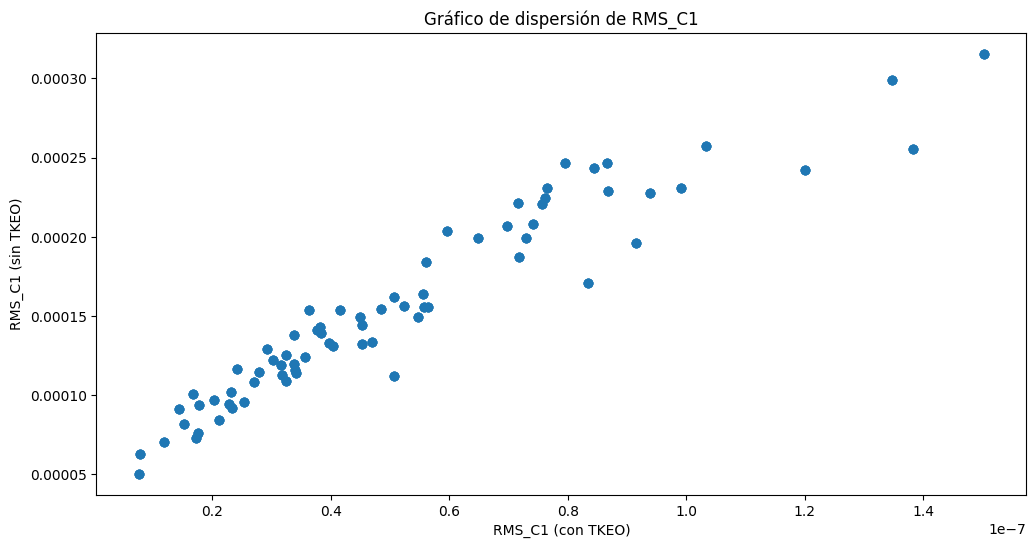

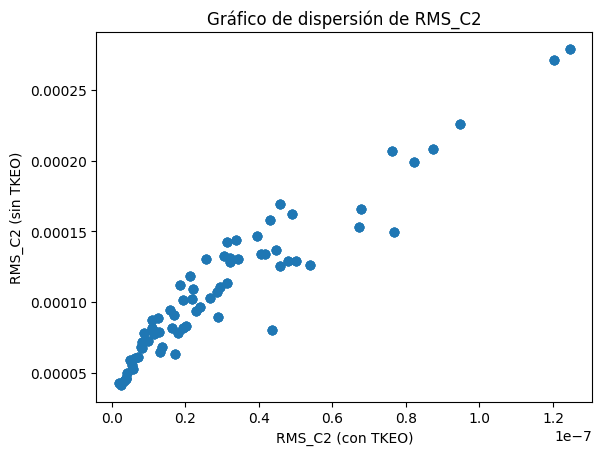

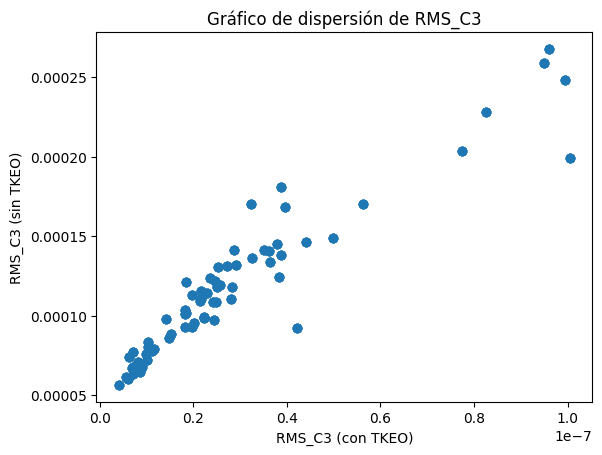

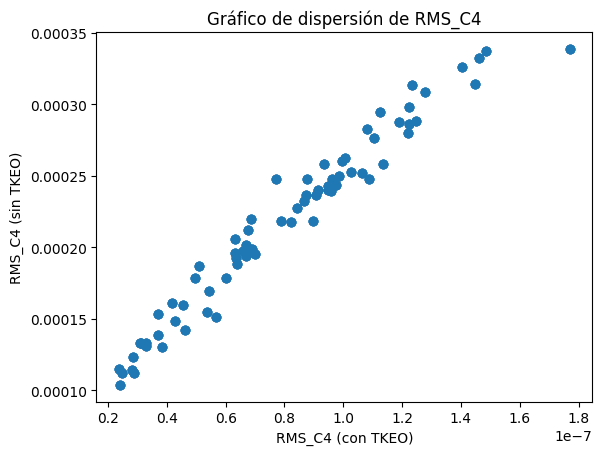

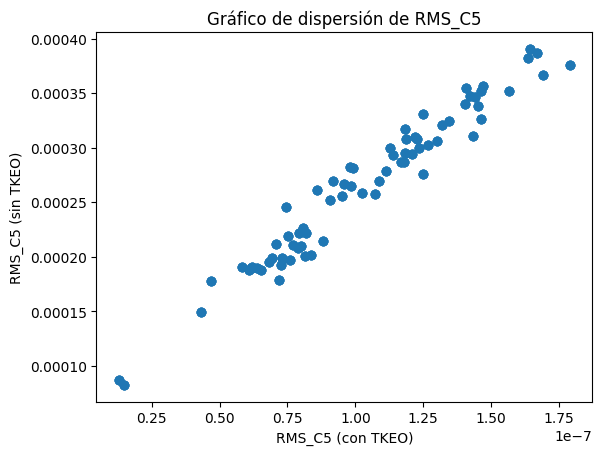

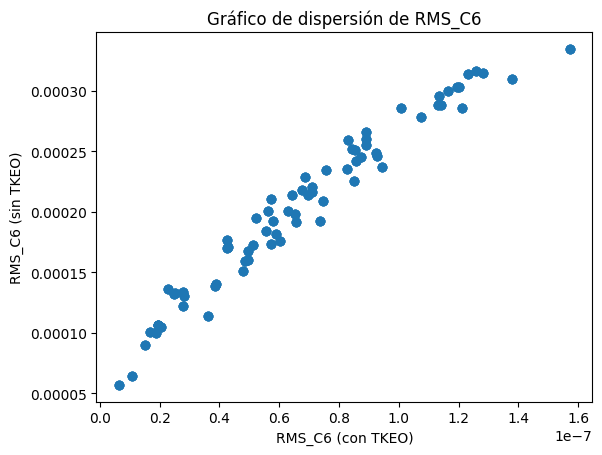

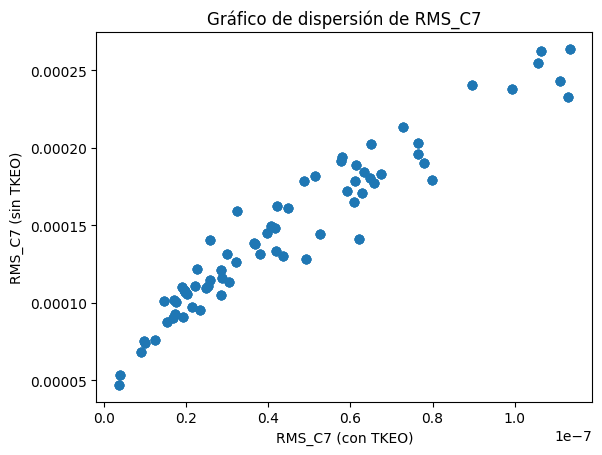

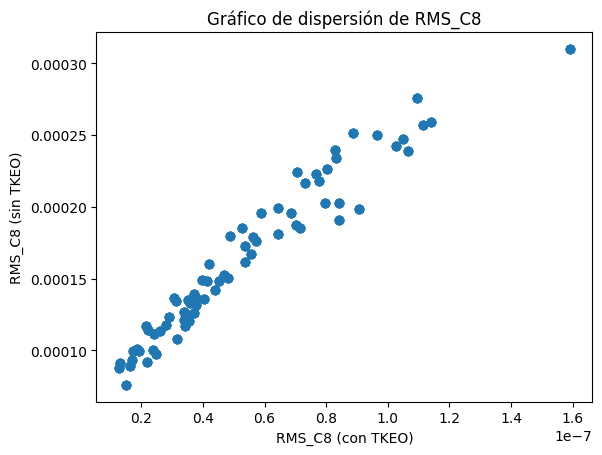

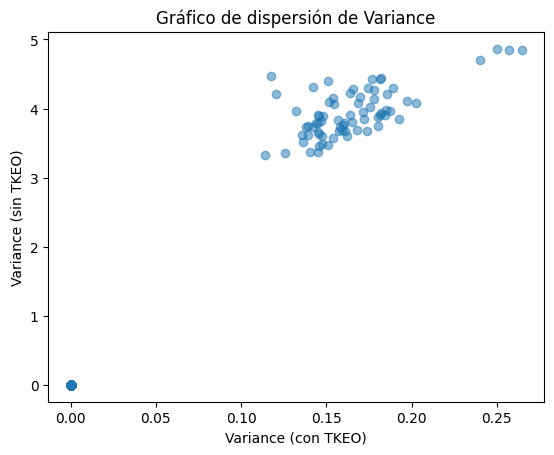

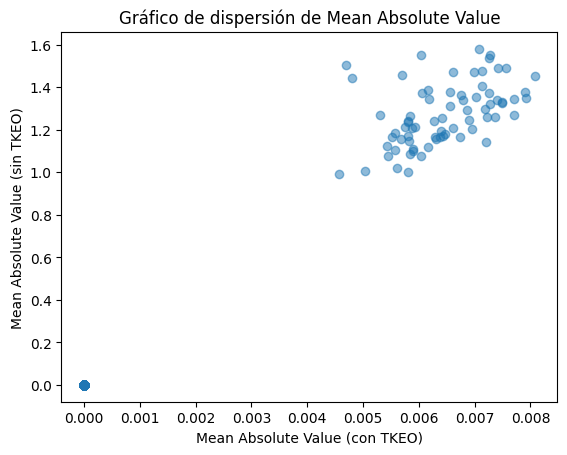

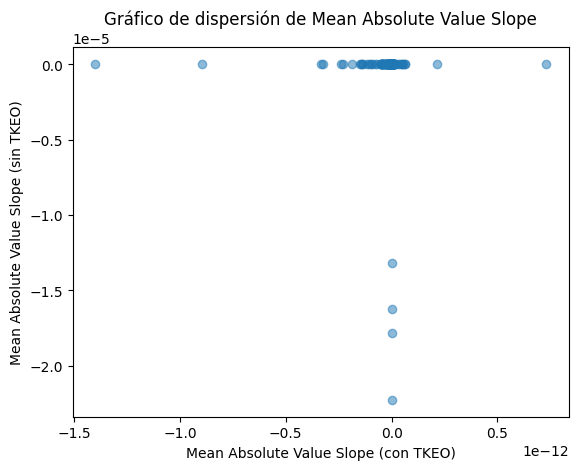

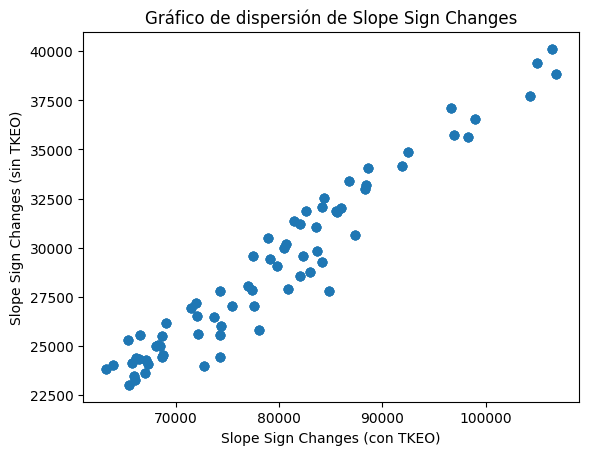

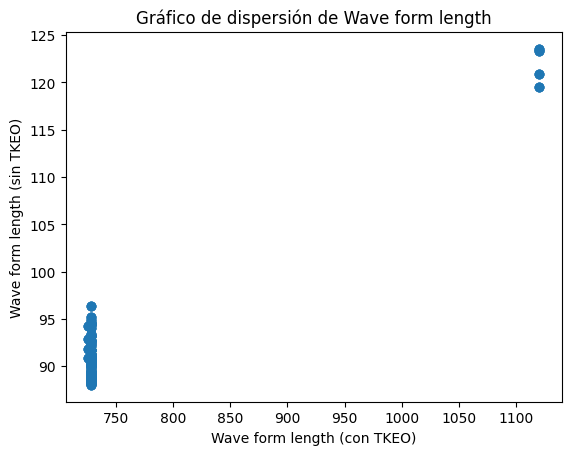

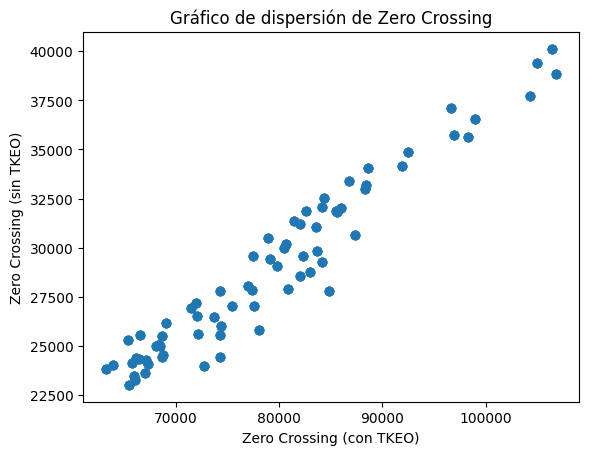

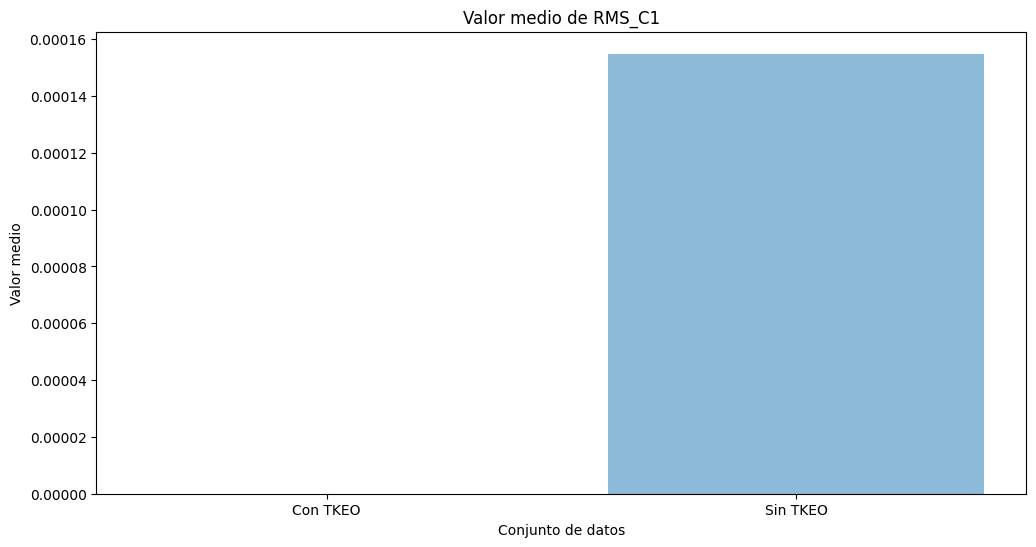

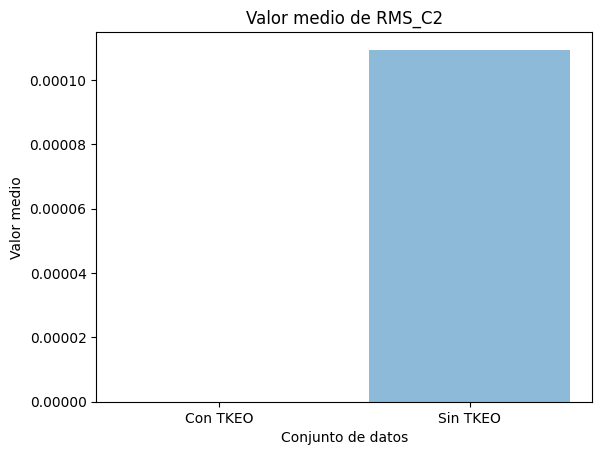

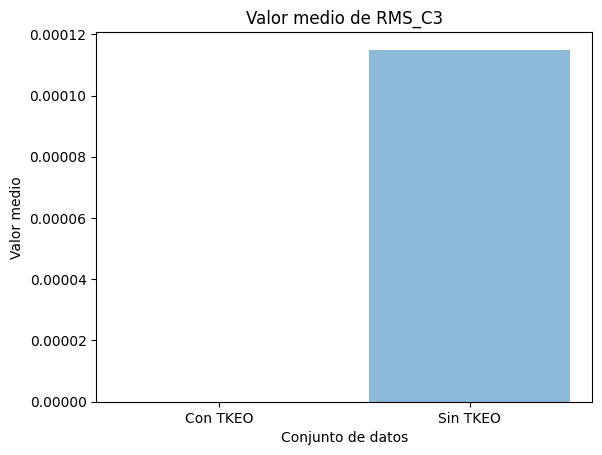

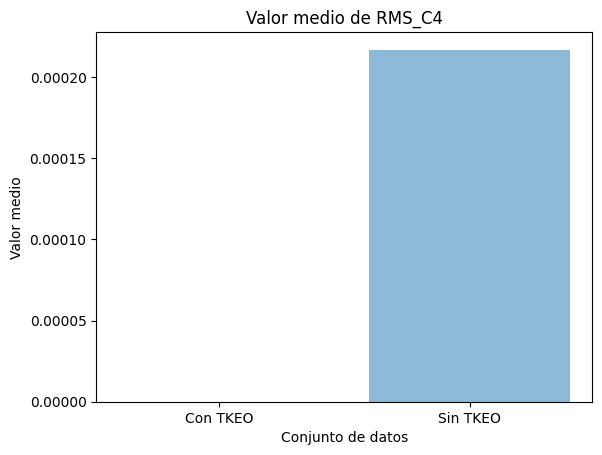

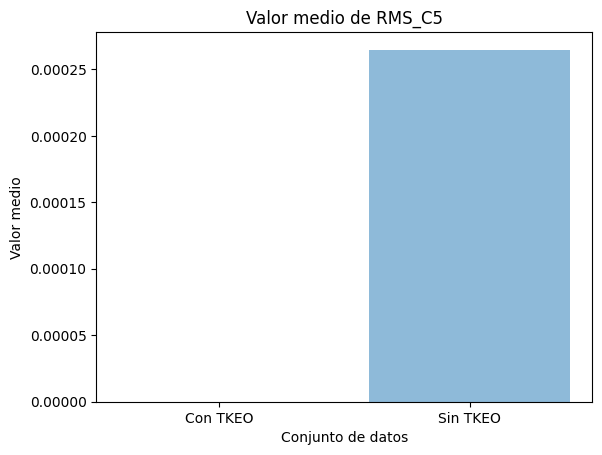

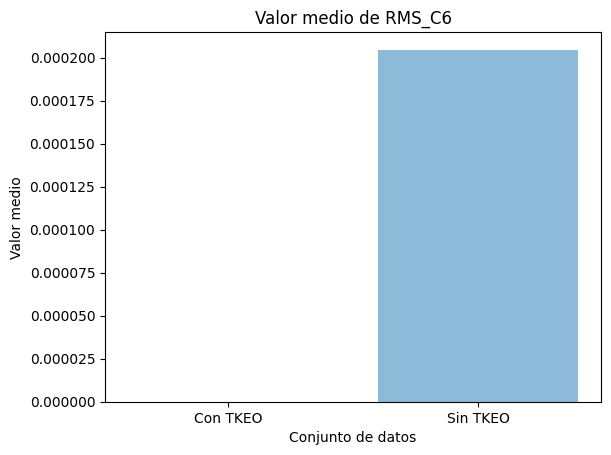

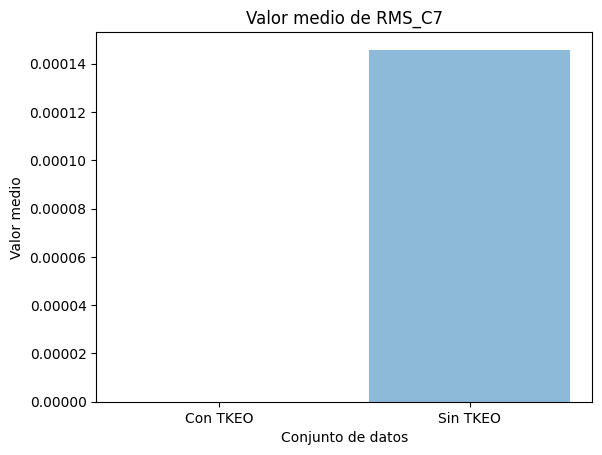

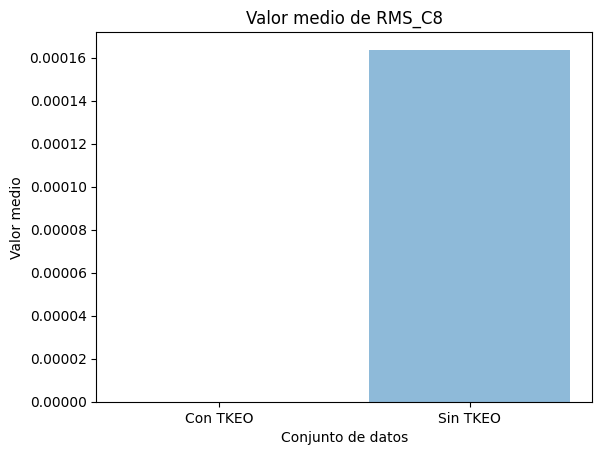

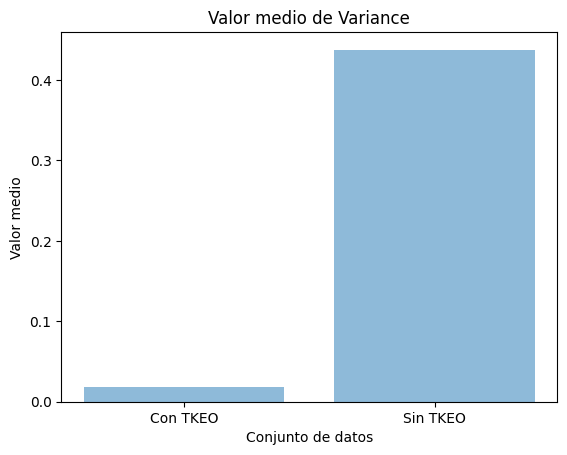

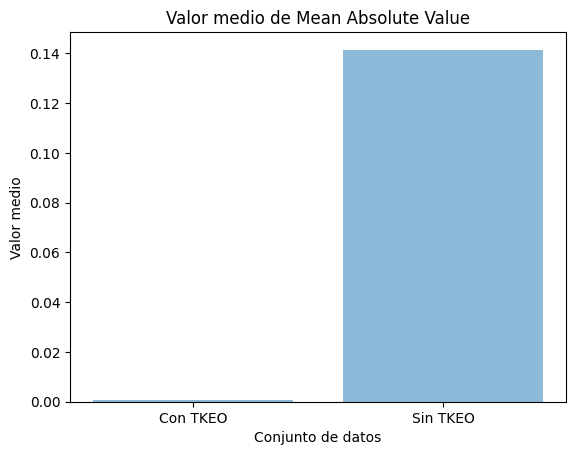

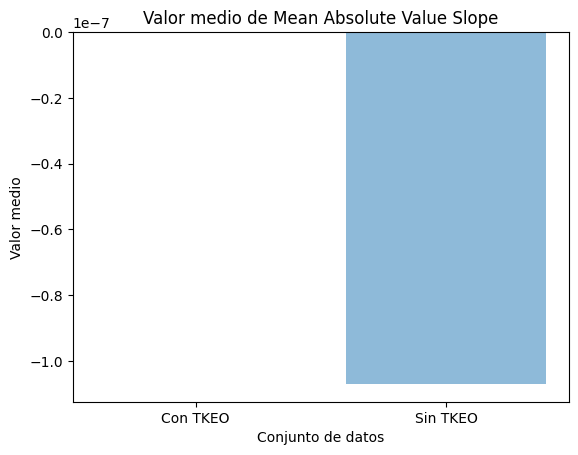

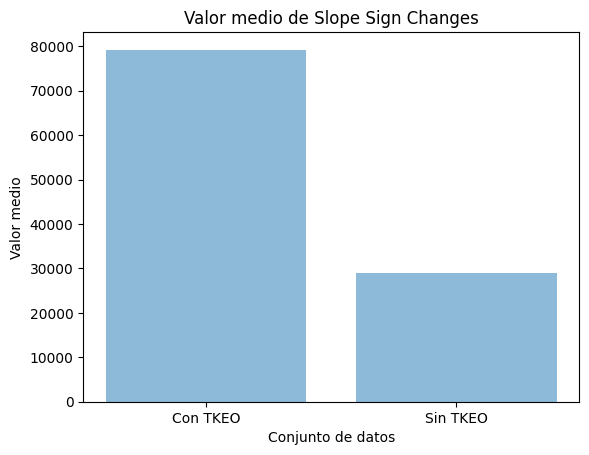

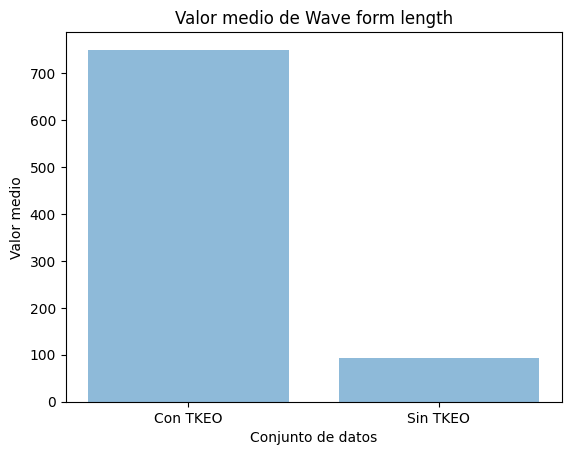

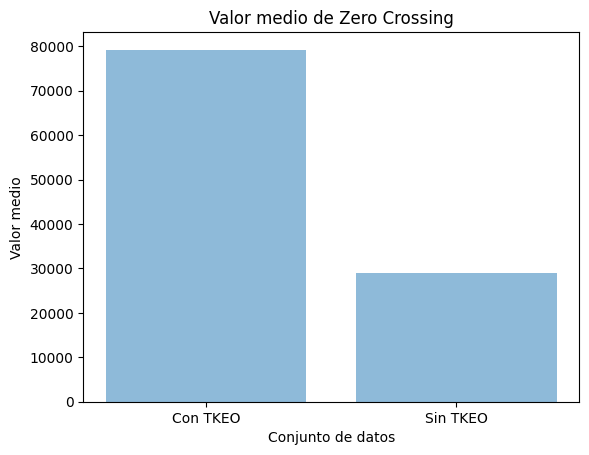

In [ ]:
import matplotlib.pyplot as plt

# Gráficos de dispersión
plt.figure(figsize=(12, 6))
for feature in df_caracteristicas_concatenado_tkeo.columns[:-1]:  # Excluir la columna 'TKEO'
    plt.scatter(df_caracteristicas_concatenado_tkeo[feature], df_caracteristicas_concatenado_original[feature], alpha=0.5)
    plt.xlabel(f'{feature} (con TKEO)')
    plt.ylabel(f'{feature} (sin TKEO)')
    plt.title(f'Gráfico de dispersión de {feature}')
    plt.show()

# Gráficos de barras o de puntos
plt.figure(figsize=(12, 6))
for feature in df_caracteristicas_concatenado_tkeo.columns[:-1]:  # Excluir la columna 'TKEO'
    plt.bar(['Con TKEO', 'Sin TKEO'], [df_caracteristicas_concatenado_tkeo[feature].mean(), df_caracteristicas_concatenado_original[feature].mean()], alpha=0.5)
    plt.xlabel('Conjunto de datos')
    plt.ylabel('Valor medio')
    plt.title(f'Valor medio de {feature}')
    plt.show()


El valor del Root Mean Square (RMS) para los datos sin TKEO fue menor en comparación con los datos con TKEO, esto podría indicar una reducción en la amplitud. El TKEO puede reducir la amplitud de la señal al eliminar el ruido y las componentes de baja frecuencia, lo que resulta en un RMS menor en los datos procesados. Por otro lado, el TKEO podría estar eliminando componentes irrelevantes o no deseadas de la señal, lo que conduce a una señal más limpia pero con menor amplitud en términos generales.

Un aumento en el valor de Zero Crossing después de aplicar el Teager-Kaiser Energy Operator (TKEO) podría deberse a un aumento en las transiciones entre valores de la seña. El TKEO puede resaltar las transiciones rápidas entre valores de la señal, lo que resultaría en un mayor número de cruces por cero.

Además, El TKEO puede hacer que la señal sea más sensible a los cambios, lo que podría detectar más cruces por cero en la señal procesada. Si el TKEO elimina el ruido de la señal, es posible que las fluctuaciones aleatorias que atraviesan cero sean más evidentes, lo que aumentaría el número de cruces por cero.

Por otro lado, un valor menor del valor medio de Waveform Length para los datos con TKEO puede indicar que la señal procesada tiene una forma de onda más corta en comparación con la señal original. La Waveform Length es una medida de la longitud total de la forma de onda de la señal, que se calcula sumando las longitudes de los segmentos rectilíneos que conectan los puntos de la señal.

Si el TKEO reduce el ruido en la señal, los segmentos rectilíneos que conectan los puntos de la señal serán más cortos, lo que resultaría en una Waveform Length menor. El TKEO puede suavizar la señal al resaltar las características importantes y reducir las fluctuaciones no deseadas. Como resultado, los segmentos rectilíneos que conectan los puntos de la señal pueden ser más cortos, lo que disminuiría la Waveform Length. Esto podría resultar en una forma de onda más compacta y menos dispersa, lo que conduciría a una Waveform Length menor.

Un menor valor de Slope Sign Changes para los datos con TKEO puede indicar una disminución en la cantidad de cambios de pendiente en la señal procesada en comparación con la señal original. La cantidad de cambios de pendiente en una señal se refiere a la frecuencia con la que la dirección de la pendiente de la señal cambia de positiva a negativa o viceversa.

Como el TKEO reduce el ruido en la señal, esto podría suavizar la pendiente de la señal y disminuir la cantidad de cambios de pendiente. El TKEO puede resaltar las características importantes de la señal mientras atenúa el ruido. Esto podría resultar en una señal con menos fluctuaciones, lo que a su vez podría reducir la cantidad de cambios de pendiente.

Además, el TKEO puede modificar la forma de onda de la señal al resaltar ciertas características y atenuar otras. Esto podría afectar la cantidad de cambios de pendiente en la señal, especialmente si elimina componentes de alta frecuencia que contribuyen a los cambios rápidos de pendiente.

Un menor valor de Mean Absolute Value Slope para los datos con TKEO indica que la pendiente absoluta promedio de la señal procesada es menor en comparación con la señal original. El TKEO puede reducir la tasa de cambio de la señal al resaltar las partes más importantes y suavizar las fluctuaciones no deseadas. Esto resultaría en una pendiente absoluta promedio menor para la señal procesada.

Al suavizar la señal, el TKEO puede reducir las variaciones abruptas y los cambios bruscos, lo que disminuiría la pendiente absoluta promedio de la señal. Si el TKEO compacta la señal al resaltar características importantes, esto puede hacer que la señal sea más uniforme y menos propensa a cambios bruscos, lo que resultaría en una pendiente absoluta promedio menor.

Un menor valor de Mean Absolute Value para los datos con TKEO indica que la amplitud promedio de la señal procesada es menor en comparación con la señal original. El TKEO puede reducir las amplitudes de las fluctuaciones en la señal, lo que resultaría en un menor valor promedio de amplitud.

Al resaltar las partes más importantes de la señal y atenuar las fluctuaciones de menor importancia, el TKEO puede dar como resultado una señal con una amplitud promedio más baja.Si el TKEO reduce el ruido en la señal, esto podría disminuir la amplitud promedio de la señal procesada.

Finalmente, un menor valor medio de varianza para los datos con TKEO indica que la dispersión de los datos alrededor de su media es menor en comparación con los datos originales. El TKEO reduce el ruido en la señal, lo que resultaría en una varianza más baja.

Al resaltar las partes más importantes de la señal y atenuar las fluctuaciones de menor importancia, el TKEO puede dar como resultado una señal con una varianza más baja. Una varianza más baja puede indicar una señal más homogénea, con menos fluctuaciones entre los valores.

Los datos en los gráficos de dispersión coinciden con las observaciones realizadas anteriormente, lo que respalda aún más las conclusiones derivadas del análisis de las características. Los gráficos de dispersión proporcionan una visualización directa de cómo se distribuyen los datos y cómo se relacionan entre sí.Los puntos en los gráficos de dispersión reflejan las tendencias que esperaríamos según las características analizadas, lo que fortalece la validez de nuestro análisis.

# **Planteamiento de las hipótesis nulas y alternativas, selección del tipo de prueba (paramétrica o no paramétrica) (5%) y discusión de los resultados.**

Dado el contexto de los datos proporcionados (características de señales EMG antes y después de aplicar el operador TKEO), podemos plantear las siguientes hipótesis nulas y alternativas, así como la selección del tipo de prueba y la discusión de los resultados:

* Hipótesis Nula (H0): No hay diferencia significativa entre las características de las señales EMG antes y después de aplicar el operador TKEO.

* Hipótesis Nula Específica:
No hay diferencia en el valor medio del RMS.
No hay diferencia en el valor medio de la varianza.
No hay diferencia en el valor medio del valor absoluto medio.
No hay diferencia en el valor medio del cambio de signo de la pendiente.
No hay diferencia en el valor medio de la longitud de la forma de onda.
No hay diferencia en el valor medio de la cantidad de cruces por cero.
Hipótesis Alternativa (H1): Existe una diferencia significativa entre las características de las señales EMG antes y después de aplicar el operador TKEO.

* Hipótesis Alternativa Específica:
Hay una diferencia en el valor medio del RMS.
Hay una diferencia en el valor medio de la varianza.
Hay una diferencia en el valor medio del valor absoluto medio.
Hay una diferencia en el valor medio del cambio de signo de la pendiente.
Hay una diferencia en el valor medio de la longitud de la forma de onda.
Hay una diferencia en el valor medio de la cantidad de cruces por cero.
Tipo de Prueba:

Dado que estamos comparando dos conjuntos de datos (antes y después de aplicar el operador TKEO) para determinar si hay una diferencia significativa en las características de las señales EMG, podemos utilizar una prueba t para muestras emparejadas si los supuestos de normalidad, independencia y homogeneidad de varianza se cumplen. Si alguno de estos supuestos no se cumple, podemos recurrir a pruebas no paramétricas como la prueba de Wilcoxon para muestras pareadas.






In [12]:
from scipy import stats

# 1. Realizar la prueba de normalidad (por ejemplo, prueba de Shapiro-Wilk) para ambos conjuntos de datos
# Esta prueba verifica si los datos siguen una distribución normal
normality_tkeo = stats.shapiro(df_caracteristicas_concatenado_tkeo['RMS_C1'])
normality_original = stats.shapiro(df_caracteristicas_concatenado_original['RMS_C1'])

# 2. Realizar la prueba de homocedasticidad (por ejemplo, prueba de Levene) para verificar la igualdad de varianzas
# Esta prueba verifica si las varianzas de los dos grupos son iguales
homogeneity = stats.levene(df_caracteristicas_concatenado_tkeo['RMS_C1'], df_caracteristicas_concatenado_original['RMS_C1'])

# 3. Realizar la prueba t de Student para muestras relacionadas
# Esta prueba compara las medias de los dos grupos de datos
t_statistic, p_value = stats.ttest_rel(df_caracteristicas_concatenado_tkeo['RMS_C1'], df_caracteristicas_concatenado_original['RMS_C1'])

# 4. Imprimir los resultados
print("Resultados de la prueba de normalidad:")
print("Datos con TKEO:", normality_tkeo)
print("Datos originales:", normality_original)
print("\nResultado de la prueba de homocedasticidad (Levene):", homogeneity)
print("\nResultado de la prueba t:")
print("Estadística t:", t_statistic)
print("p-valor:", p_value)

# 5. Interpretar los resultados
# Si el p-valor es menor que el nivel de significancia (generalmente 0.05), rechazamos la hipótesis nula
# y concluimos que hay una diferencia significativa entre los dos grupos de datos.
# De lo contrario, no podemos rechazar la hipótesis nula y no hay suficiente evidencia para afirmar que hay una diferencia significativa.


Resultados de la prueba de normalidad:
Datos con TKEO: ShapiroResult(statistic=0.9121479392051697, pvalue=6.638933501774701e-19)
Datos originales: ShapiroResult(statistic=0.9522385597229004, pvalue=1.2262780580470783e-13)

Resultado de la prueba de homocedasticidad (Levene): LeveneResult(statistic=1051.5534507097288, pvalue=2.4684834090140077e-169)

Resultado de la prueba t:
Estadística t: -66.60130574895537
p-valor: 8.527510346256506e-292


# **Discusión de Resultados:**

Los resultados obtenidos de las pruebas estadísticas indican lo siguiente:

Prueba de normalidad (Shapiro-Wilk):

* **Datos con TKEO:**

El estadístico de prueba es 0.912 con un p-valor extremadamente pequeño (6.64e-19), lo que indica que hay evidencia significativa en contra de la normalidad de los datos.
Datos originales: El estadístico de prueba es 0.952 con un p-valor también muy pequeño (1.23e-13), lo que sugiere que los datos originales tampoco siguen una distribución normal.

* **Prueba de homocedasticidad (Levene):**

El estadístico de prueba es 1051.55 con un p-valor muy cercano a cero (2.47e-169), lo que indica que hay una diferencia significativa en las varianzas entre los datos con TKEO y los datos originales. Por lo tanto, no se cumple el supuesto de homocedasticidad.

* **Prueba t de Student para muestras relacionadas:**

La estadística t es -66.60 con un p-valor extremadamente pequeño (8.53e-292), lo que sugiere que hay una diferencia significativa entre las medias de los dos grupos de datos. Dado que el p-valor es mucho menor que el nivel de significancia usual de 0.05, rechazamos la hipótesis nula de que las medias son iguales y concluimos que hay una diferencia significativa entre los datos con TKEO y los datos originales.

Es por esto que, los datos con TKEO y los datos originales no siguen una distribución normal y tienen varianzas significativamente diferentes. Además, hay una diferencia significativa entre las medias de ambos grupos de datos. Estos resultados sugieren que la aplicación de TKEO tiene un efecto significativo en las características de la señal, lo que puede ser importante en el análisis de las señales EMG.

##**CONCLUSIONES**

1. **Importancia de la extracción de señales EEG para el estudio muscular**: La extracción de señales electromiográficas (EMG) es fundamental para comprender la actividad muscular y detectar posibles anomalías neuromusculares.
al combinar la información obtenida de la señal EEG con un optimo de procesamiento la señal, se puede obtener una comprensión más completa de la función muscular, lo que es crucial para el diagnóstico y tratamiento de trastornos neuromusculares.

2. **Rol del procesamiento de señales en la comprensión muscular**: El procesamiento de señales desempeña un papel clave en la comprensión de la actividad muscular, ya que permite extraer características relevantes de la señal EMG y **facilitar** su comprencion permitiendo analizar su comportamiento en el tiempo y en el dominio de la frecuencia. Esto permite la identificación de patrones musculares específicos y proporciona información valiosa para evaluar la función muscular y detectar posibles anomalías.

3. **Análisis de datos mediante el TKEO**: El operador Teager-Kaiser Energy Operator (TKEO) simplifica el análisis de señales EMG al suavizar o atenuar la forma de onda y reducir el ruido y los artefactos.
Al atenuar los picos manteniendo la actividad muscular relevante, el TKEO facilita la interpretacion y manipulacion de nuestra señal de interes, lo que agiliza el proceso de análisis y aumenta la eficacia de las aplicaciones relacionadas con la electromiografía.

4. **Análisis exploratorio de los datos**: En general, se observó que el valor RMS fue menor para los datos con TKEO en comparación con los datos originales. Esto sugiere que el TKEO puede reducir la amplitud de las señales EMG. Se observó que la varianza fue menor para los datos con TKEO en comparación con los datos originales. Esto indica que el TKEO puede disminuir la variabilidad de las señales EMG. El valor medio de la magnitud absoluta fue menor para los datos con TKEO en comparación con los datos originales. Esto sugiere que el TKEO puede reducir la media de la magnitud absoluta de las señales EMG. Se observó un menor número de cambios de signo de pendiente para los datos con TKEO en comparación con los datos originales. Esto indica que el TKEO puede suavizar las variaciones rápidas en las señales EMG. El valor medio de la longitud de la forma de onda fue menor para los datos con TKEO en comparación con los datos originales. Esto sugiere que el TKEO puede reducir la longitud de las formas de onda de las señales EMG. Se observó un mayor número de cruces por cero para los datos con TKEO en comparación con los datos originales. Esto indica que el TKEO puede aumentar la cantidad de cruces por cero en las señales EMG. En general, estos resultados sugieren que la aplicación del operador TKEO a las señales EMG puede tener un impacto significativo en varias características de las señales, incluida su amplitud, variabilidad y forma de onda.
4. **Prueba t de student**: Los datos analizados mostraron que tanto los datos con TKEO como los datos originales no siguen una distribución normal y tienen varianzas significativamente diferentes, lo que indica una alteración en la distribución y la dispersión de los datos después de aplicar el TKEO.
Además, la prueba t de Student reveló una diferencia altamente significativa entre las medias de los dos grupos de datos, lo que sugiere que el TKEO modifica de manera considerable las características medibles de las señales EMG.

Estos hallazgos tienen importantes implicaciones para la interpretación de las señales EMG y sugieren que el TKEO puede ser una herramienta útil para resaltar ciertas características de interés en las señales, lo que podría facilitar la detección de patrones específicos o la extracción de características relevantes para aplicaciones de diagnóstico o control de prótesis, entre otros usos en el campo de la electromiografía.